### 데이터 셋
- https://archive.ics.uci.edu/
- 50만건 데이터 (2010/12 ~ 2011/12)
- 영국기반 데이터 셋

In [1]:
import seaborn as sns
sns.set_theme(style='whitegrid')

In [2]:
import matplotlib.pyplot as plt
import koreanize_matplotlib 
import pandas as pd
import numpy as np

In [3]:
retail_df = pd.read_excel("./data/Online Retail.xlsx")

### 데이터 탐색

In [4]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


- InvoiceNo    : 주문번호
- StockCode    : 상품코드
- Description  : 상품상세설명
- Quantity     : 주문수량
- UnitPrice    : 상품가격
- CustomerID   : 고객아이디
- Country      : 고객 거주지역

In [5]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
retail_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
retail_df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


### 데이터 전처리

In [8]:
# customerID 가 null 인 데이터 제거

# retail_df['CustomerID'].dropna(inplace=True)

retail_df = retail_df[retail_df['CustomerID'].notnull()]
retail_df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [9]:
# 수량 , 가격 0 보다 작은 데이터 제거
retail_df = retail_df[(retail_df['Quantity'] > 0) & (retail_df['UnitPrice'] > 0)]
retail_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [10]:
# 데이터 정리 후 행 수 확인
len(retail_df)

397884

In [11]:
# customerID 데이터 타입 변경 int32 : astype

retail_df['CustomerID'] = retail_df['CustomerID'].astype("int32")
print(retail_df['CustomerID'].dtype)

int32


In [12]:
# CheckoutPrice = Quantity * UnitPrice
retail_df['CheckoutPrice'] = retail_df['Quantity'] * retail_df['UnitPrice']

In [13]:
retail_df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00


In [14]:
# 정제 데이터 저장
retail_df.to_csv("./data/OnlineRetailClean.xlsx",header=None,index=False)

In [15]:
retail_df = pd.read_csv("./data/OnlineRetailClean.xlsx")
retail_df.head()

,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.299999999999999
0,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
1,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
2,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
3,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom,15.30


In [16]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397883 entries, 0 to 397882
Data columns (total 9 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   536365                              397883 non-null  int64  
 1   85123A                              397883 non-null  object 
 2   WHITE HANGING HEART T-LIGHT HOLDER  397883 non-null  object 
 3   6                                   397883 non-null  int64  
 4   2010-12-01 08:26:00                 397883 non-null  object 
 5   2.55                                397883 non-null  float64
 6   17850                               397883 non-null  int64  
 7   United Kingdom                      397883 non-null  object 
 8   15.299999999999999                  397883 non-null  float64
dtypes: float64(2), int64(3), object(4)
memory usage: 27.3+ MB


In [18]:
retail_df.columns = ['0', 'InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country', 'CheckoutPrice']

ValueError: Length mismatch: Expected axis has 9 elements, new values have 10 elements

In [ ]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397881 entries, 0 to 397880
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   0              397881 non-null  int64  
 1   InvoiceNo      397881 non-null  int64  
 2   StockCode      397881 non-null  object 
 3   Description    397881 non-null  object 
 4   Quantity       397881 non-null  int64  
 5   InvoiceDate    397881 non-null  object 
 6   UnitPrice      397881 non-null  float64
 7   CustomerID     397881 non-null  int64  
 8   Country        397881 non-null  object 
 9   CheckoutPrice  397881 non-null  float64
dtypes: float64(2), int64(4), object(4)
memory usage: 30.4+ MB


In [ ]:
# 0 번컬럼 삭제
retail_df = retail_df.drop(columns=['0'])
retail_df.head()

KeyError: "['0'] not found in axis"

In [ ]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397881 entries, 0 to 397880
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   InvoiceNo      397881 non-null  int64  
 1   StockCode      397881 non-null  object 
 2   Description    397881 non-null  object 
 3   Quantity       397881 non-null  int64  
 4   InvoiceDate    397881 non-null  object 
 5   UnitPrice      397881 non-null  float64
 6   CustomerID     397881 non-null  int64  
 7   Country        397881 non-null  object 
 8   CheckoutPrice  397881 non-null  float64
dtypes: float64(2), int64(3), object(4)
memory usage: 27.3+ MB


In [ ]:
# InvoiceDate object => datetime
retail_df['InvoiceDate'] = pd.to_datetime(retail_df['InvoiceDate'])


In [ ]:
print(retail_df['InvoiceDate'].dtype)

datetime64[ns]


### 데이터 분석
- 매출액 분석
   - 전체매출
   - 국가별매출
   - 월별 매출
   - 일별 매출
   - 시간대별매출

In [ ]:
#전체 매출액
# retail_df['CheckoutPrice'] 매출액

retail_df['CheckoutPrice'].sum()



np.float64(8911350.264)

In [ ]:
# 국가별 매출액
# groupby
rev_by_contries = retail_df.groupby('Country')['CheckoutPrice'].sum().sort_values().reset_index()
rev_by_contries.head(10)
# retail_df.head()

,Country,CheckoutPrice
0,Saudi Arabia,145.92
1,Bahrain,548.40
2,Czech Republic,826.74
3,RSA,1002.31
4,Brazil,1143.60
5,European Community,1300.25
6,Lithuania,1661.06
7,Lebanon,1693.88
8,United Arab Emirates,1902.28
9,Unspecified,2667.07


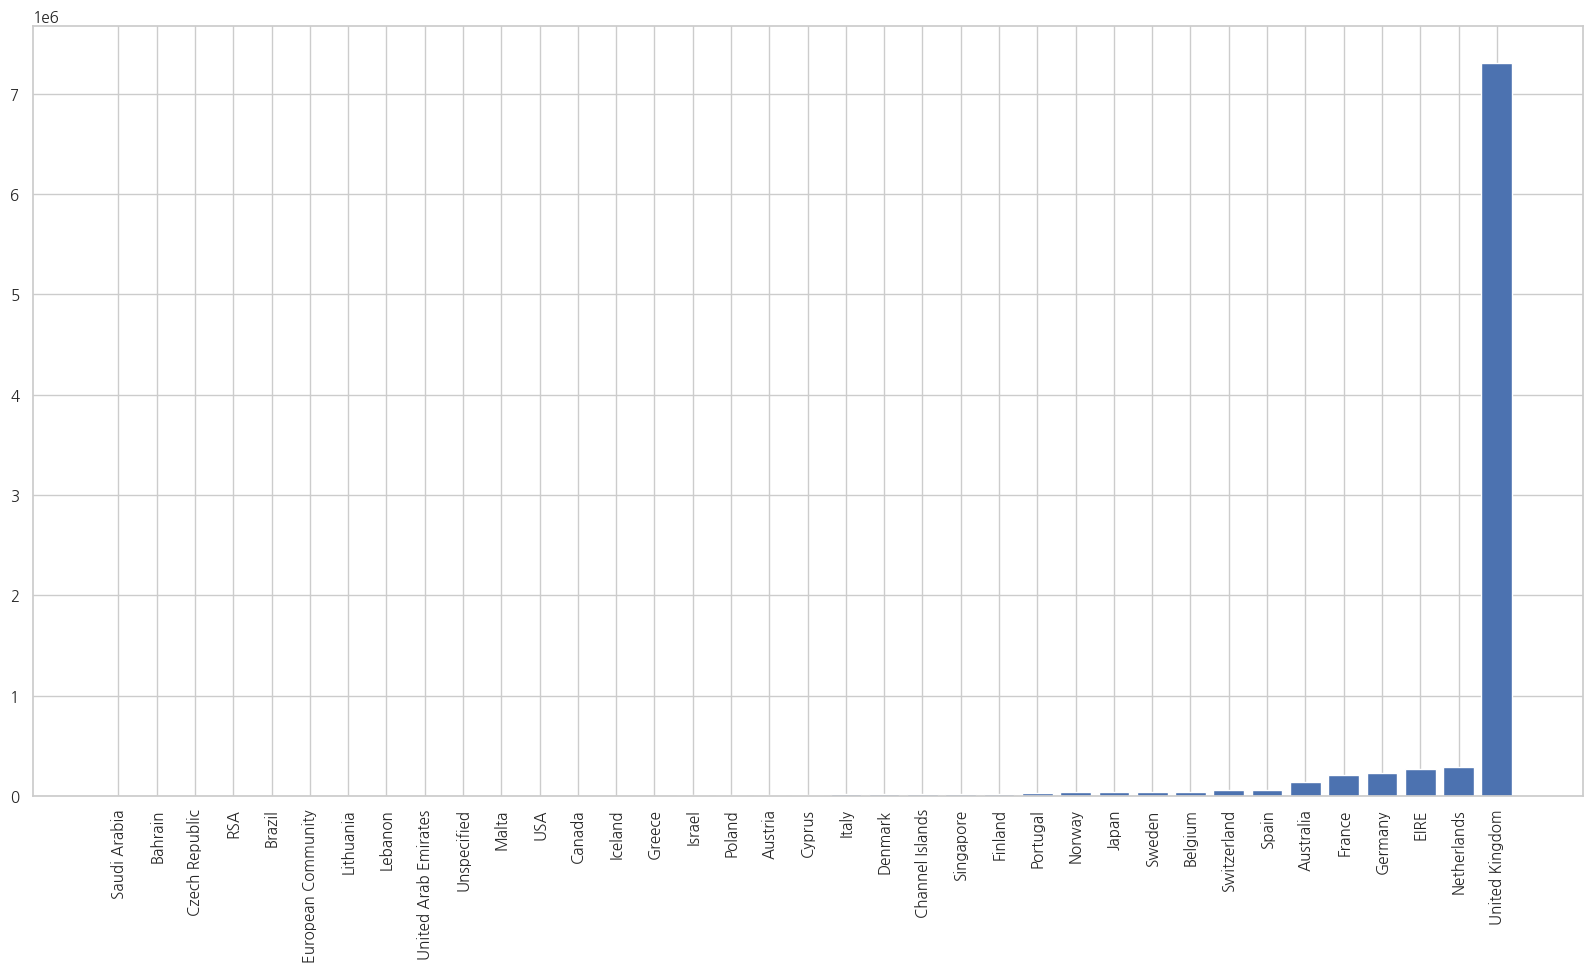

In [ ]:
# matplot bar 차트
plt.figure(figsize=(20,10))
plt.bar(rev_by_contries['Country'],rev_by_contries['CheckoutPrice'])
g = plt.xticks(rotation=90)

In [ ]:
# 요일별 매출

# dayofweek : 날짜 => 숫자(요일) 0:월요일